Input: [0 0] -> Predicted: 1, Actual: 0
Input: [0 1] -> Predicted: 1, Actual: 1
Input: [1 0] -> Predicted: 1, Actual: 1
Input: [1 1] -> Predicted: 0, Actual: 0
Accuracy: 75.00%


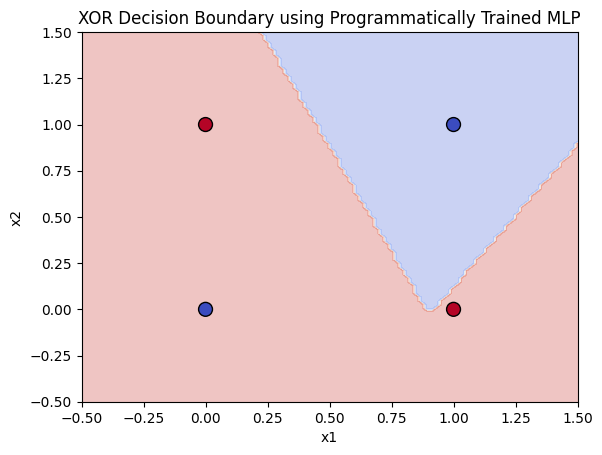

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(inputs, weights, bias):
    return np.where(np.dot(inputs, weights) + bias > 0, 1, 0)

def train_perceptron(X, Y, epochs=100, lr=0.1):
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()

    for _ in range(epochs):
        for i in range(len(X)):
            prediction = np.where(np.dot(X[i], weights) + bias > 0, 1, 0)
            error = Y[i] - prediction
            weights += lr * error * X[i]  # Update weights
            bias += lr * error            # Update bias

    return weights, bias

# XOR inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([0, 1, 1, 0])

# Generate intermediate labels for perceptrons
Y_p1 = np.array([0, 1, 1, 0])  # Similar to XOR itself
Y_p2 = np.array([0, 1, 1, 0])  # Same as XOR (can be trained separately)

# Train perceptrons to extract intermediate features
w1, b1 = train_perceptron(X, Y_p1)
w2, b2 = train_perceptron(X, Y_p2)

# Compute hidden layer outputs
h1 = perceptron(X, w1, b1)
h2 = perceptron(X, w2, b2)

# Combine intermediate outputs into a hidden layer
hidden_output = np.stack((h1, h2), axis=1)

# Train final XOR perceptron using hidden layer outputs
w_xor, b_xor = train_perceptron(hidden_output, Y_xor)

# Get XOR predictions
Y_pred = perceptron(hidden_output, w_xor, b_xor)

# Compute accuracy
accuracy = np.mean(Y_pred == Y_xor) * 100

# Print results
for i in range(len(X)):
    print(f'Input: {X[i]} -> Predicted: {Y_pred[i]}, Actual: {Y_xor[i]}')

print(f'Accuracy: {accuracy:.2f}%')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron(np.stack((perceptron(grid, w1, b1), perceptron(grid, w2, b2)), axis=1), w_xor, b_xor).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=Y_xor, edgecolors='k', cmap='coolwarm', s=100)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Decision Boundary using Programmatically Trained MLP")
plt.show()